In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd 
import pandas as pd

***
<font size="5"> Linear Regression </font>
***

In [2]:
#Apenas uma demonstração de como ler e trabalhar com um dataframe em pandas

df = pd.read_csv("HousingData.csv")  #Leitura do csv

In [19]:
df.info()   #Mostra informações básicas do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [20]:
df.head(10) #Mostra as 10 primeiras linhas do dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [21]:
df.tail(10) #Mostra as 10 últimas linhas do dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [22]:
df.describe()   #Mostra estatísticas básicas do dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [23]:
df.isna().sum()  #Conta quantos valores NaN tem por coluna

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [24]:
#Os calores NaN serão preenchidos com a média da coluna
df = df.fillna(df.mean())
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Preparing data for the linear regression task

X shape:  (506, 2)
y shape:  (506, 1)


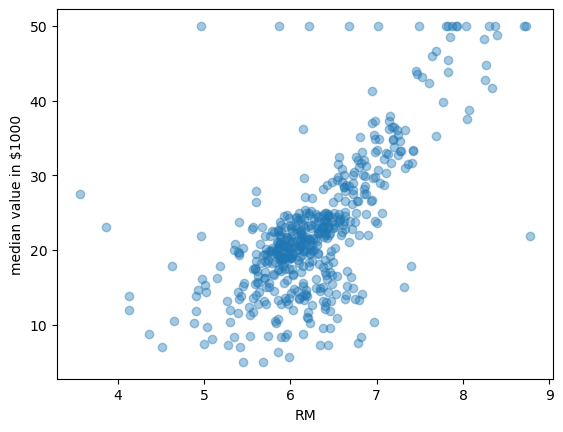

In [25]:
# All features: CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT

# choose one input feature
colname = 'RM'
X = df.loc[:, colname]  #Cria uma série de pandas com os valores da coluna selecionada
X = X.to_numpy().reshape(-1,1)  #Transforma essa série em um numpy.array, com quantas linhas forem necessárias e uma coluna
X = np.concatenate([np.ones((len(X), 1)), X], axis = 1)  #Cria uma matriz onde a primeira coluna só tem 1 e a segunda tem os valores do nosso np.array

# target feature
y = df.loc[:, 'MEDV']
y = y.to_numpy()
y = y.reshape((-1,1))

# Mostra quantas linhas e quantas colunas tem nossa matriz
print("X shape: ", X.shape)
print("y shape: ", y.shape)

# Plot the chosen (X,y) dataset
plt.scatter(X[:,1], y, alpha=0.4) #Plota, no eixo x, os valores da primeira coluna da matriz X. No eixo y, plota os valores da única coluna da matriz y
plt.xlabel(colname)
plt.ylabel('median value in $1000')

plt.show()

***
<font size="5"> Deterministic Approach </font>
***

# Linear regression recap

Given a dataset $\{(\mathbf{x}^{(1)}, y^{(1)}), \dots ,(\mathbf{x}^{(N)}, y^{(N)})\}$ with $\mathbf{x}^{(i)} \in \mathbb{R}^{d}$ and $y^{(i)} \in \mathbb{R}$, we consider the family of linear models consisting of functions of the form
$$
h(\mathbf{x}^{(i)}; \mathbf{w}) = w_0 + \sum_{j=1}^{d} w_jx_j
$$
where $\mathbf{w} = (w_0, w_1, \ldots, w_d)$.

Note that $h(\mathbf{x}^{(i)}; \mathbf{w})$ is, in fact, an  [affine transformation](https://en.wikipedia.org/wiki/Affine_transformation) of  $\mathbf{x}^{(i)}$. As commonly done, we will use the term "linear" to refer to an affine transformation.

The output of $h$ is a linear transformation of $\mathbf{x}^{(i)}$. We use the notation $h(\mathbf{x}^{(i)}; \mathbf{w})$ to make clear that $h$ is a parametric model, i.e., the transformation $h$ is defined  by the parameters $\mathbf{w}$. We can view vector $\mathbf{w}$ as a *weight* vector that controls the effect of each *feature* in the prediction.

By adding one component with value equal to 1 to the instances $\mathbf{x}$ (an artificial coordinate), we have:

$$\tilde{\mathbf{x}} = (1, x_1, \ldots, x_d) \in \mathbb{R}^{1+d}$$

and then we can simplify the notation:
$$
\hat{y}^{(i)} = h(\mathbf{x}^{(i)}; \mathbf{w}) = \mathbf{w}^\top  \tilde{\mathbf{x}}^{(i)}
$$

We would like to determine the optimal parameters $\mathbf{w}$ such that prediction $\hat{y}^{(i)}$ is as closest as possible to $y^{(i)}$ according to some error metric. Adopting the *mean square error* (MSE) as such metric we have the following cost function:

\begin{equation}
\mathcal{L}(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^{N}\big(\hat{y}^{(i)} - y^{(i)}\big)^{2}
\end{equation}

Thus, our task is to determine a function $h$ that minimizes $\mathcal{L}(\mathbf{w})$.



### The solution


Given $f:\mathbb{R}^{N\times d} \rightarrow \mathbb{R}$ and $\mathbf{A} \in \mathbb{R}^{N\times d}$, we define the gradient of $f$ with respect to $\mathbf{A}$ as:

\begin{equation*}
\nabla_{\mathbf{A}}f = \frac{\partial f}{\partial \mathbf{A}} =  \begin{bmatrix}
\frac{\partial f}{\partial \mathbf{A}_{1,1}} & \dots & \frac{\partial f}{\partial \mathbf{A}_{1,d}} \\
\vdots &  \ddots & \vdots \\
\frac{\partial f}{\partial \mathbf{A}_{n,1}} &  \dots & \frac{\partial f}{\partial \mathbf{A}_{n,d}}
\end{bmatrix}
\end{equation*}

Let $\mathbf{X} \in \mathbb{R}^{N\times (1+d)}$ be a matrix (sometimes also called the *design matrix*) whose rows are the extended instances of the input data and let $\mathbf{y} \in \mathbb{R}^{N}$ be the vector consisting of all values $y^{(i)}$ (i.e., $\mathbf{X}{[i,:]} = \mathbf{\tilde{x}}^{(i)}$ and $\mathbf{y}{[i]} = y^{(i)}$). It can be verified that: 

\begin{equation}
\mathcal{L}(\mathbf{w}) = \frac{1}{N}(\mathbf{X}\mathbf{w} - \mathbf{y})^{T}(\mathbf{X}\mathbf{w} - \mathbf{y})
\end{equation}

To find the parameter $\mathbf{w}$ that minimizes the loss $\mathcal{L}(\mathbf{w})$ , using basic matrix derivative concepts we can compute the gradient of $\mathcal{L}(\mathbf{w})$ with respect to $\mathbf{w}$:

\begin{equation}
\nabla_{\mathbf{w}}\mathcal{L}(\mathbf{w}) = \frac{2}{N} (\mathbf{X}^{T}\mathbf{X}\mathbf{w} -\mathbf{X}^{T}\mathbf{y})   
\end{equation}

Thus, when $\nabla_{\mathbf{w}}\mathcal{L}(\mathbf{w}) = 0$ we have 

\begin{equation}
\mathbf{X}^{T}\mathbf{X}\mathbf{w} = \mathbf{X}^{T}\mathbf{y}
\end{equation}

Hence,

\begin{equation}
\mathbf{w} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}
\end{equation}

This is a straighforward way to solve the esquation and find the parameter values of $\mathbf{w}$. Note that this solution has a high computational cost. As the number of variables (*features*) increases, the cost for matrix inversion becomes prohibitive.
There are other ways to solve linear equation systems, but they are out of scope of this course. 

In [26]:
def compute_weights(X, y):
    """
    Computes the weights of a linear function using the normal equation method.
    X is the input data matrix, already with the leftmost column with 1s.

    :param X: input data matrix
    :type X: np.ndarray(shape=(N, 1+d))
    :param y: regression targets
    :type y: np.ndarray(shape=(N, 1))
    :return: weight vector
    :rtype: np.ndarray(shape=(1+d, 1))
    """
    
    X_tranpose = np.transpose(X)
    w = np.linalg.inv(X_tranpose @ X) @ X_tranpose @ y #the weight vector
    return w
     

In [27]:
def make_prediction(X, w):
    """
    Computes the prediction over a set of observations X using the linear function
    characterized by the weight vector w.
    X is the input data matrix, already with the leftmost column with 1s.

    :param X: input data matrix
    :type X: np.ndarray(shape=(N, 1+d))
    :param w: weight vector
    :type w: np.ndarray(shape=(1+d, 1))
    :return: regression prediction
    :rtype: np.ndarray(shape=(N, 1))
    """
    
    return X @ w
    

## Testing the functions

We will split the dataset into training and testing parts. We will compute the weight vector using the training part and see how it fits to the test data. We will compute fitting metrics along the way.

In [28]:
from sklearn.model_selection import train_test_split

# Let us fisrt split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

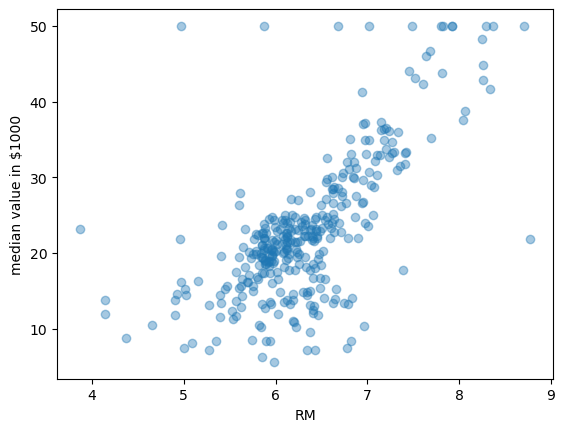

In [29]:
# plotting the training data
plt.scatter(X_train[:,1], y_train, alpha=0.4)
plt.xlabel(colname)
plt.ylabel('median value in $1000')

plt.show()

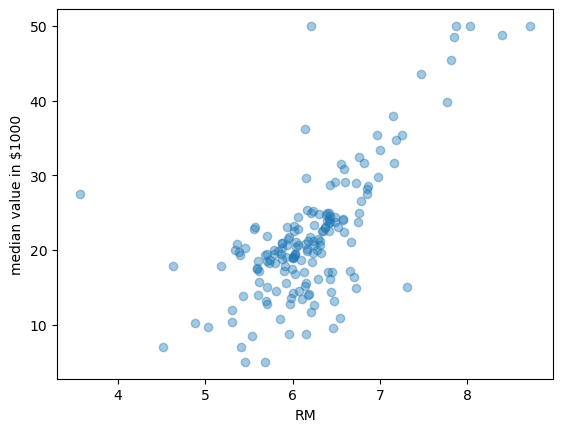

In [30]:
# plotting the testing data
plt.scatter(X_test[:,1], y_test, alpha=0.4)
plt.xlabel(colname)
plt.ylabel('median value in $1000')

plt.show()

### Training (Finding w)</mark>

Solve the problem for the training data. Use the weight computation function.
Print the resulting weight vector and plot the linear function on top of the data points.
You should get a plot like the one below:

<img src="https://www.ime.usp.br/~nina/foo.png" alt="drawing" width="300"/>

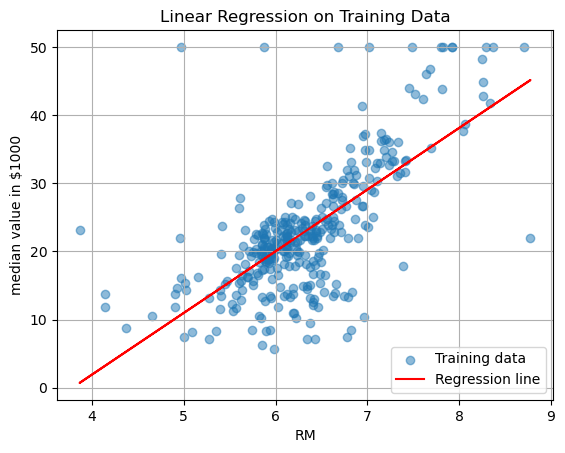

Estimated w =
 [[-34.22235235]
 [  9.03907314]]


In [31]:
# Solve the problem using the training data
# Print the weight vector
# Plot the linear function on top of the data points

w = 0  # this is temporary
w = compute_weights(X_train, y_train)
y_hat_train = make_prediction(X_train, w)

# Eixo X: valores reais da feature (ex: RM)
#        -> segunda coluna de X_train
x_values = X_train[:, 1]

# Eixo Y: y verdadeiro (pontos reais)
plt.scatter(x_values, y_train, alpha=0.5, label='Training data')

# Reta: predição feita pelo modelo
plt.plot(x_values, y_hat_train, color='red', label='Regression line')

# Rótulos e título
plt.xlabel('RM')
plt.ylabel('median value in $1000')
plt.title('Linear Regression on Training Data')
plt.legend()
plt.grid(True)
plt.show()

print("Estimated w =\n", w)


## Fitting metrics

Besides the MSE loss, we can use the [$R^2$](https://pt.wikipedia.org/wiki/R%C2%B2) metric (Coefficient of determination) to evaluate how well the linear model fits the data.

Use [r2_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) of the [scikit-learn](https://scikit-learn.org/) library to compute the coefficient of determination (R2).

In [32]:
def compute_mse(y, yhat):
    """
    Computes the mean squared error (MSE) loss.

    :param y: vector with target output values
    :type y: np.ndarray(shape=(N,1))
    :param yhat: vector with predicted output values 
    :type yhat: np.ndarray(shape=(N, 1))
    :return: mse
    :rtype: float
    """
    
    error = y - yhat
    squared_error = error**2
    mse = np.mean(squared_error)
    
    return mse

In [33]:
from sklearn.metrics import r2_score

mse = compute_mse(y_train, y_hat_train)
r2 = r2_score(y_train, y_hat_train)
print("MSE =", mse) 
print("R2 =", r2 )


MSE = 45.82902170074136
R2 = 0.4800686358449543


###  Evaluate the model on the test data</mark>

Print MSE and R2 computed the on test data. Use the prediction and MSE loss computation functions you wrote above and the r2_score function. Also, plot the datapoints of the test set and the linear function on top of them.

Compare these metrics on the training and testing sets.

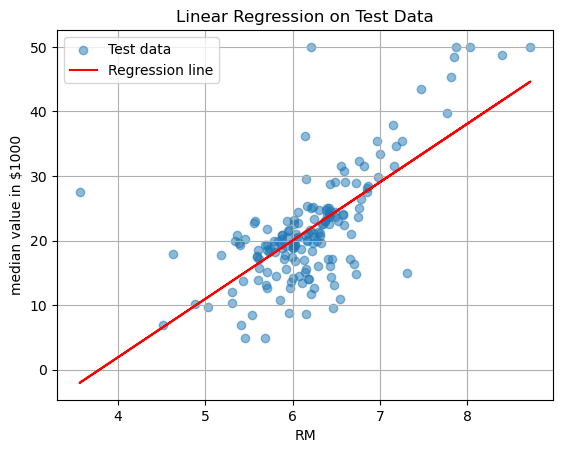

MSE = 39.09105111487
R2 = 0.48345901689194815


In [ ]:
from sklearn.metrics import r2_score

y_hat_test = make_prediction(X_test, w)
mse = compute_mse(y_test, y_hat_test)
r2 = r2_score(y_test, y_hat_test)


x_test_values = X_test[:, 1] 
plt.scatter(x_test_values, y_test, alpha=0.5, label='Test data')
plt.plot(x_test_values, y_hat_test, color='red', label='Regression line')

plt.xlabel('RM')
plt.ylabel('median value in $1000')
plt.title('Linear Regression on Test Data')
plt.legend()
plt.grid(True)
plt.show()

print("MSE =", mse) 
print("R2 =", r2 )

## Testing cases with $d>1$</mark>

Now, let us consider input data that consists of multiple features.
Your code for computing the weights and making the prediction should work for $d>1$ too.

In [37]:
# Features: CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT

# Choose two or more features and write the code to build matrix X and target vector y
# For instance, try 'RM' and 'LSTAT'

features = int(input("Number of features (beetween 1 and 13)"))
while(features < 1 or features > 13):
    print("Number not valid. Choose a valid number of features")
    features = int(input("Number of features (beetween 1 and 13)"))
colnames = []
print("Possible features: CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT")
for i in range(features):
    colname = input("choose a feature that was still not choosen: ")
    colnames.append(colname)
X_new = df.loc[:, colnames]  #Create a pandas series whit the values of the selectd colouns
X_new = X_new.to_numpy()
X_new = np.concatenate([np.ones((len(X_new), 1)), X_new], axis = 1)  #Add a coloun with 1's

# target feature
y_new = df.loc[:, 'MEDV']
y_new = y_new.to_numpy()
y_new = y_new.reshape((-1,1))

print("X shape: ", X_new.shape)
print("y shape: ", y_new.shape)

Possible features: CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT
X shape:  (506, 5)
y shape:  (506, 1)


In [38]:
# Write the code to perform the linear regression on the new dataset built in the above cell.
# This time there is no need to split the data into training and testing.

# The weight computation and prediction funcstions written above should work without mofdification
# Print the estimated weight vector, the MSE loss and the coefficient of determination R2

w_new = 0  # this is temporary
w_new = compute_weights(X_new, y_new)
y_hat_new = make_prediction(X_new, w_new)
mse = compute_mse(y_new, y_hat_new)
r2 = r2_score(y_new, y_hat_new)


print("Estimated w =\n", w_new)
print("MSE =", mse) 
print("R2 =", r2 )


Estimated w =
 [[-22.3952981 ]
 [ -0.15584099]
 [ -0.20379479]
 [ -0.08608734]
 [  7.72867954]]
MSE = 36.49419936776168
R2 = 0.5677044392385574
